In [1]:
!mkdir -p coco
!cd coco && wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!cd coco && unzip annotations_trainval2017.zip


--2025-09-16 11:47:59--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.83.116, 16.182.41.129, 3.5.28.123, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.83.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  13.4MB/s    in 20s     

2025-09-16 11:48:20 (12.1 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


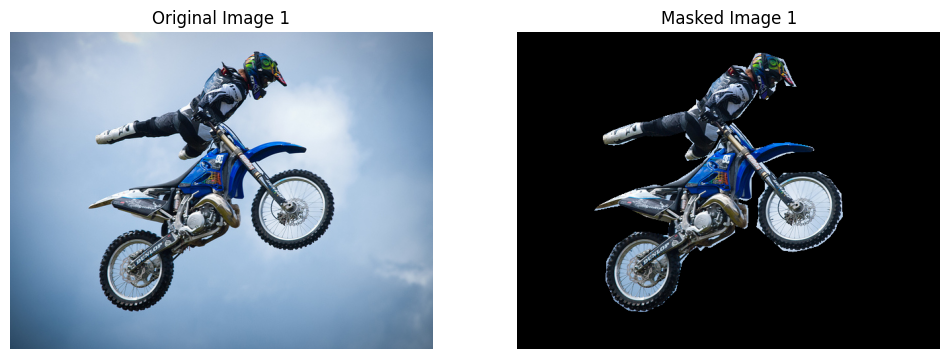

Processed image ID: 190756
Number of annotations: 2


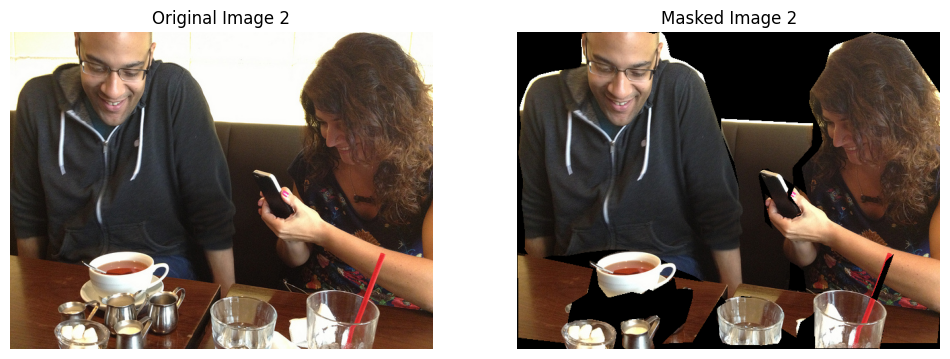

Processed image ID: 66771
Number of annotations: 11


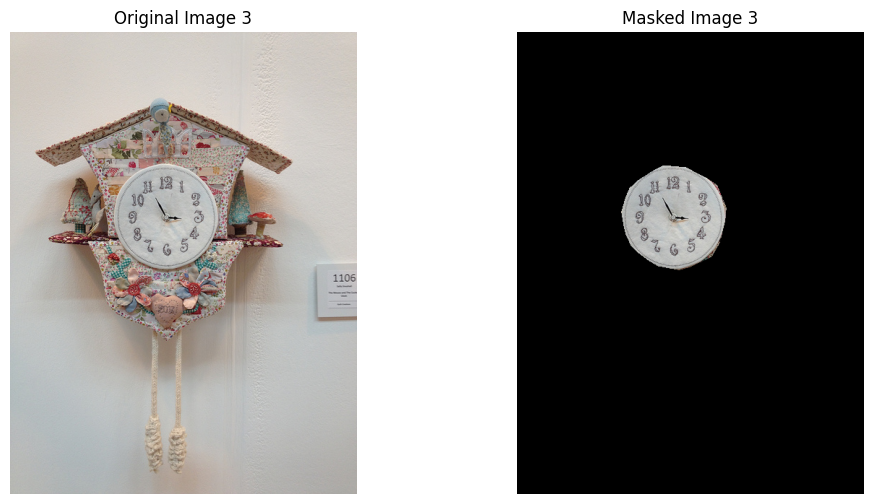

Processed image ID: 161642
Number of annotations: 1


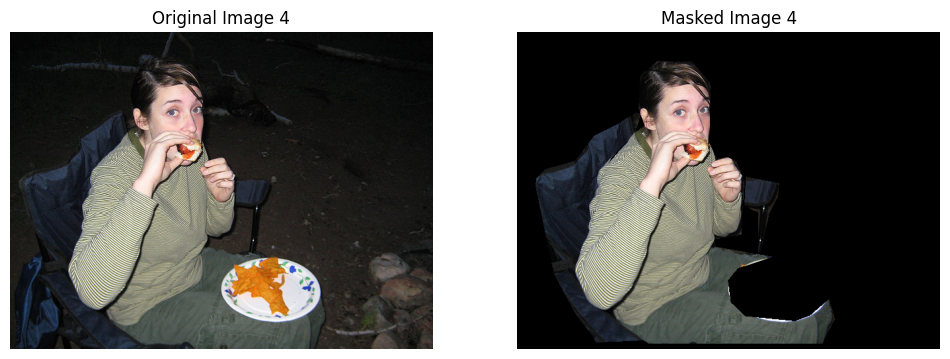

Processed image ID: 18193
Number of annotations: 3


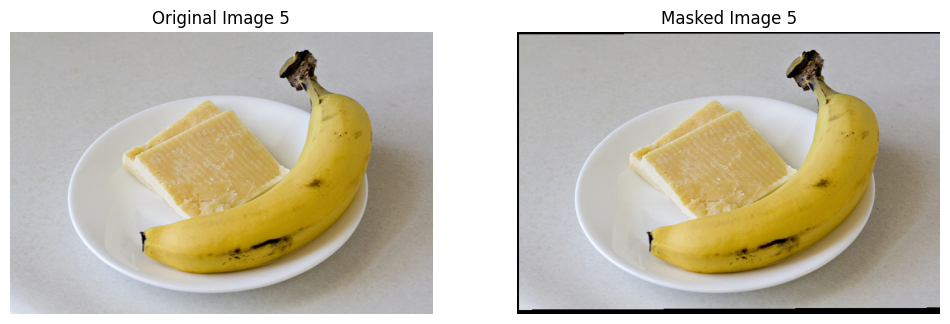

Processed image ID: 114871
Number of annotations: 2


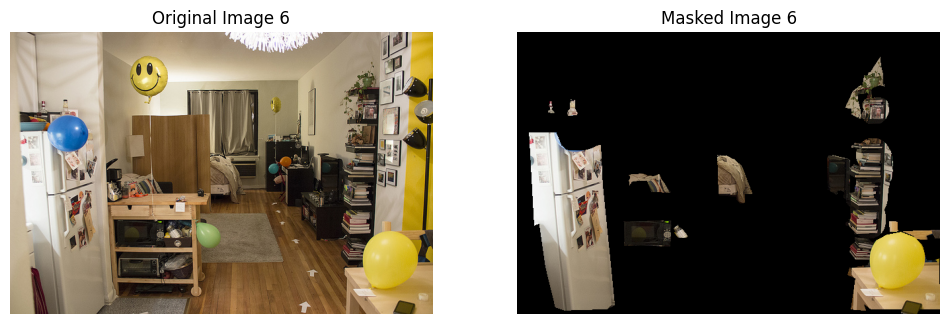

Processed image ID: 14038
Number of annotations: 25


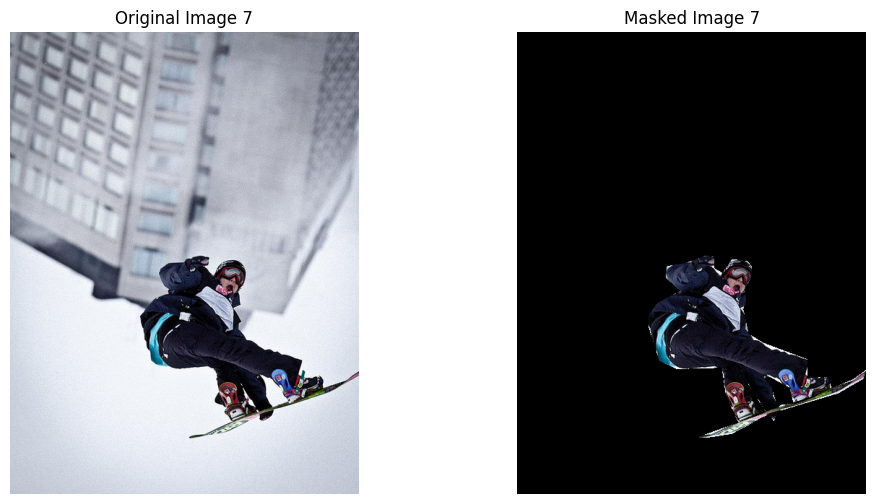

Processed image ID: 400044
Number of annotations: 2


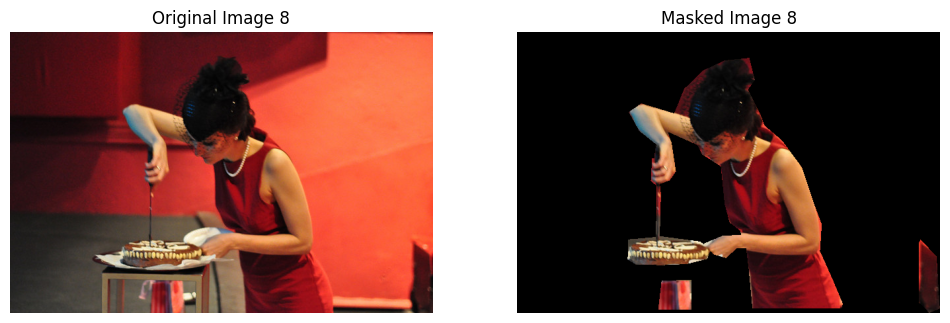

Processed image ID: 158956
Number of annotations: 5


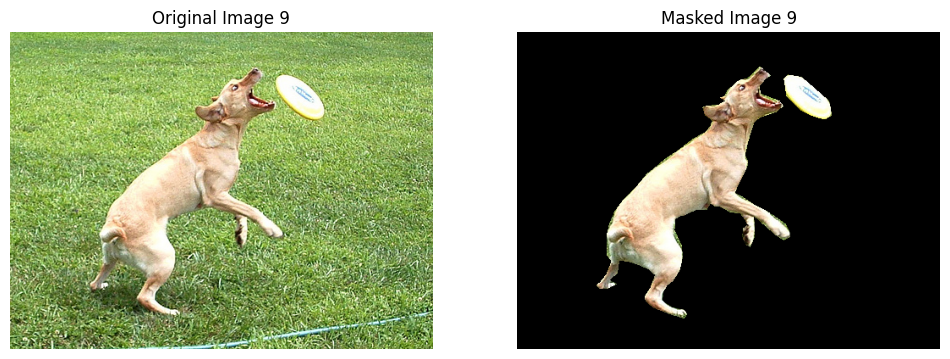

Processed image ID: 255664
Number of annotations: 2


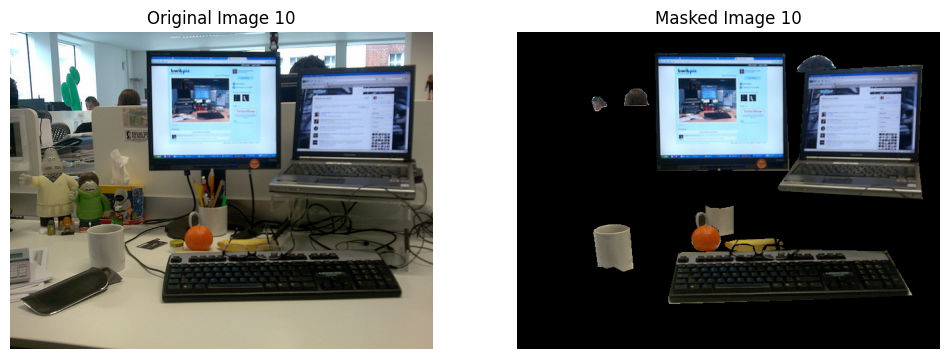

Processed image ID: 63740
Number of annotations: 11


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from PIL import Image
import random

# Path setup
dataDir = "/content/coco"  # Corrected path to the downloaded annotations in Colab
dataType = "val2017"
annFile = f"{dataDir}/annotations/instances_{dataType}.json"
img_folder = "/content/coco/val2017" # Image folder path

# Initialize COCO API
coco = COCO(annFile)

# Get all image IDs
imgIds = coco.getImgIds()

# Select 10 random images (assuming random_ids are already defined and images downloaded)
# random_ids = random.sample(imgIds, 10) # Keep this if you want to select new images each time

for i, imgId in enumerate(random_ids):
    img = coco.loadImgs(imgId)[0]
    # The images themselves are not downloaded, so we skip this part for now.
    I = Image.open(os.path.join(img_folder, img['file_name'])).convert("RGB")
    I_np = np.array(I)

    # Load annotations
    annIds = coco.getAnnIds(imgIds=img['id'])
    anns = coco.loadAnns(annIds)

    # Create an empty mask
    mask = np.zeros((img['height'], img['width']), dtype=np.uint8)

    # Combine all object masks into one binary mask
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann))

    # Apply mask to original image (objects visible, background black)
    masked_img = I_np * mask[:, :, None]   # broadcast mask to 3 channels

    # Show image and masked image side by side
    plt.figure(figsize=(12,6))

    # Original image
    plt.subplot(1,2,1)
    plt.imshow(I)
    plt.axis('off')
    plt.title(f"Original Image {i+1}")

    # Masked image (background removed)
    plt.subplot(1,2,2)
    plt.imshow(masked_img)
    plt.axis('off')
    plt.title(f"Masked Image {i+1}")

    plt.show()
    print(f"Processed image ID: {imgId}")
    print(f"Number of annotations: {len(anns)}")

In [9]:
# Download a subset of images for visualization
img_folder = "/content/coco/val2017"
os.makedirs(img_folder, exist_ok=True)

for imgId in random_ids:
    img = coco.loadImgs(imgId)[0]
    img_url = img['coco_url']
    img_path = os.path.join(img_folder, img['file_name'])
    if not os.path.exists(img_path):
        !wget {img_url} -P {img_folder}

--2025-09-16 11:58:33--  http://images.cocodataset.org/val2017/000000190756.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.51.249, 3.5.24.72, 16.15.195.229, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.51.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123931 (121K) [image/jpeg]
Saving to: ‘/content/coco/val2017/000000190756.jpg’

000000190756.jpg    100%[===================>] 121.03K   185KB/s    in 0.7s    

2025-09-16 11:58:34 (185 KB/s) - ‘/content/coco/val2017/000000190756.jpg’ saved [123931/123931]

--2025-09-16 11:58:34--  http://images.cocodataset.org/val2017/000000066771.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.71.217, 3.5.27.209, 52.217.11.180, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.71.217|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173790 (170K) [image/jpeg]
Saving to: ‘/content/coco/val2017/0000000667